In [ ]:
# Property of Heather Kearnan
# Intro to Data Science Fall 2020 Semester

In [2]:
import pandas as pd
import numpy as np

In [3]:
compas = pd.read_csv('data/compas.csv')
compas.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


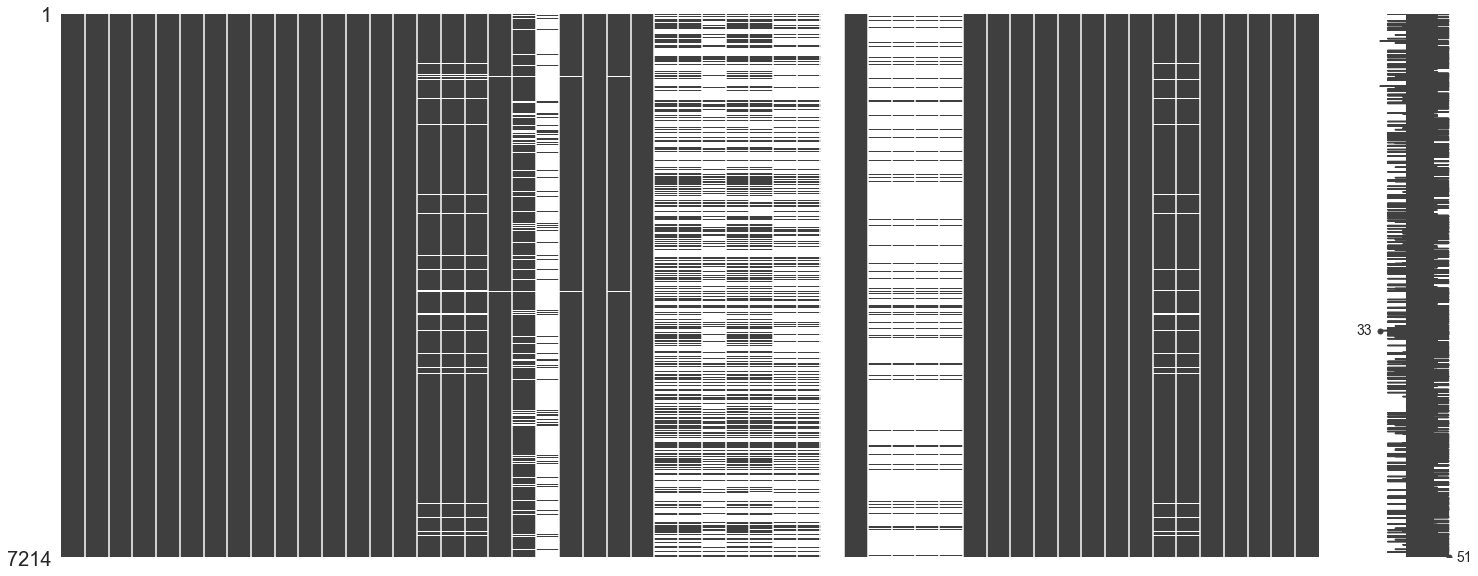

In [4]:
import missingno as msno

msno.matrix(compas)

In [55]:
compas.columns

Index(['id', 'sex', 'age', 'age_cat', 'race', 'decile_score', 'priors_count',
       'two_year_recid'],
      dtype='object')

In [6]:
compas = compas.drop(["violent_recid", "vr_charge_degree", "vr_offense_date", "vr_charge_desc", 
                      "vr_case_number", "c_arrest_date", "first", "last", "compas_screening_date", 
                      "start", "end", "event", 'score_text', 'screening_date', 'v_type_of_assessment',
                       'v_decile_score', 'v_score_text', 'v_screening_date', 'in_custody',
                       'out_custody'], axis=1)

In [7]:
compas = compas.drop(['days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
                       'c_offense_date', 'c_days_from_compas', 'c_charge_degree',
                       'c_charge_desc', "name", "dob",'r_case_number', 'r_charge_degree',
                       'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in',
                       'r_jail_out', 'type_of_assessment', 'decile_score.1', 'priors_count.1', 
                        'is_recid', 'is_violent_recid', 'juv_misd_count', 'juv_other_count',
                     'juv_fel_count'], axis=1)

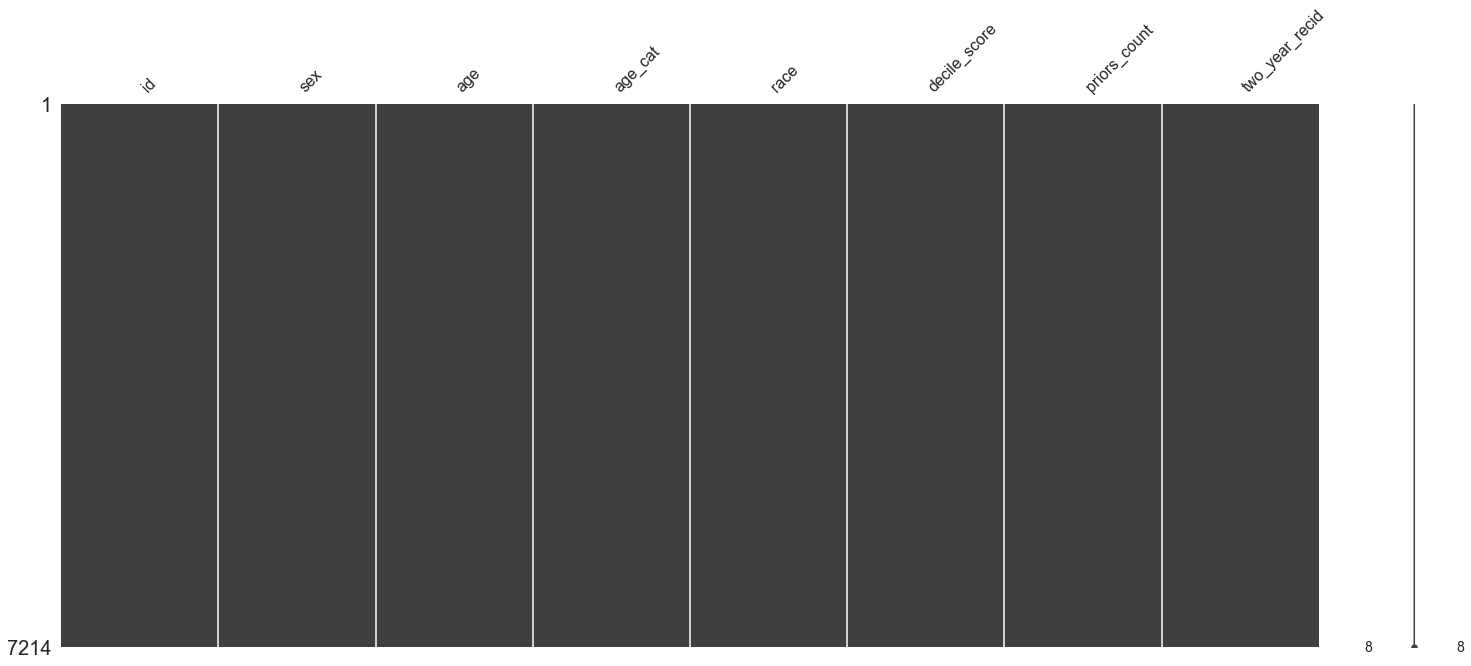

In [8]:
msno.matrix(compas)

In [9]:
compas.head(10)

,id,sex,age,age_cat,race,decile_score,priors_count,two_year_recid
0,1,Male,69,Greater than 45,Other,1,0,0
1,3,Male,34,25 - 45,African-American,3,0,1
2,4,Male,24,Less than 25,African-American,4,4,1
3,5,Male,23,Less than 25,African-American,8,1,0
4,6,Male,43,25 - 45,Other,1,2,0
5,7,Male,44,25 - 45,Other,1,0,0
6,8,Male,41,25 - 45,Caucasian,6,14,1
7,9,Male,43,25 - 45,Other,4,3,0
8,10,Female,39,25 - 45,Caucasian,1,0,0
9,13,Male,21,Less than 25,Caucasian,3,1,1


In [10]:
com = pd.get_dummies(compas)

In [11]:
com.head()

,id,age,decile_score,priors_count,two_year_recid,sex_Female,sex_Male,age_cat_25 - 45,age_cat_Greater than 45,age_cat_Less than 25,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other
0,1,69,1,0,0,0,1,0,1,0,0,0,0,0,0,1
1,3,34,3,0,1,0,1,1,0,0,1,0,0,0,0,0
2,4,24,4,4,1,0,1,0,0,1,1,0,0,0,0,0
3,5,23,8,1,0,0,1,0,0,1,1,0,0,0,0,0
4,6,43,1,2,0,0,1,1,0,0,0,0,0,0,0,1


In [12]:
com.columns

Index(['id', 'age', 'decile_score', 'priors_count', 'two_year_recid',
       'sex_Female', 'sex_Male', 'age_cat_25 - 45', 'age_cat_Greater than 45',
       'age_cat_Less than 25', 'race_African-American', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Native American',
       'race_Other'],
      dtype='object')

In [14]:
# Checkpoint So i dont have to run the code above again
# com.to_csv(r'data/compas-cleaned.csv', index = False) # Commented out so i dont run it again
com = pd.read_csv('data/compas-cleaned.csv')

In [15]:
com.head()

,id,age,decile_score,priors_count,two_year_recid,sex_Female,sex_Male,age_cat_25 - 45,age_cat_Greater than 45,age_cat_Less than 25,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other
0,1,69,1,0,0,0,1,0,1,0,0,0,0,0,0,1
1,3,34,3,0,1,0,1,1,0,0,1,0,0,0,0,0
2,4,24,4,4,1,0,1,0,0,1,1,0,0,0,0,0
3,5,23,8,1,0,0,1,0,0,1,1,0,0,0,0,0
4,6,43,1,2,0,0,1,1,0,0,0,0,0,0,0,1


In [16]:
# Set up the data for a model
comData = com.sample(frac=0.85, random_state=123)
test_data = com.drop(comData.index).reset_index(drop=True)
comData.reset_index(drop=True, inplace=True)

In [17]:
# Load the Data for the model
from pycaret import classification
from pycaret.classification import *
exp_clf101 = setup(data = comData, target = 'two_year_recid', session_id=123)

,Description,Value
0,session_id,123
1,Target,two_year_recid
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(6132, 16)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
# Run a series of models to to test a bunch of different ones
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6815,0.7276,0.6715,0.6804,0.6782,0.3474,0.3504,4.2380
gbc,Gradient Boosting Classifier,0.6813,0.7316,0.6711,0.6803,0.6778,0.3467,0.3500,0.0600
ada,Ada Boost Classifier,0.6752,0.7238,0.6658,0.6739,0.6722,0.3354,0.3379,0.0330
lda,Linear Discriminant Analysis,0.6750,0.7268,0.6635,0.6739,0.6704,0.3320,0.3361,0.0150
ridge,Ridge Classifier,0.6748,0.0000,0.6632,0.6736,0.6702,0.3315,0.3356,0.0530
lr,Logistic Regression,0.6713,0.7215,0.6590,0.6727,0.6647,0.3232,0.3303,1.2220
lightgbm,Light Gradient Boosting Machine,0.6692,0.7107,0.6596,0.6676,0.6661,0.3229,0.3252,0.0370
nb,Naive Bayes,0.6612,0.7090,0.6540,0.6598,0.6596,0.3100,0.3109,0.0060
xgboost,Extreme Gradient Boosting,0.6454,0.6876,0.6362,0.6435,0.6426,0.2753,0.2770,1.6910
rf,Random Forest Classifier,0.6431,0.6846,0.6357,0.6419,0.6412,0.2732,0.2743,0.1050


In [19]:
# offical model going to be used
xgb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6744,0.7221,0.6631,0.6729,0.6703,0.3312,0.3347
1,0.6674,0.6825,0.6533,0.6667,0.6608,0.3130,0.3193
2,0.6876,0.7303,0.6782,0.6863,0.6848,0.3608,0.3631
3,0.6993,0.7338,0.6883,0.6989,0.6953,0.3824,0.3867
4,0.6457,0.6918,0.6373,0.6435,0.6435,0.2771,0.2781
5,0.6923,0.7681,0.6839,0.6909,0.6901,0.3716,0.3733
6,0.6597,0.7084,0.6500,0.6576,0.6565,0.3035,0.3055
7,0.7040,0.7367,0.6955,0.7026,0.7019,0.3948,0.3964
8,0.7179,0.7549,0.7050,0.7192,0.7130,0.4179,0.4247
9,0.6667,0.7475,0.6603,0.6654,0.6657,0.3221,0.3224


In [20]:
# Fine Tuning the Model to get it more accurate
tuned_dt = tune_model(xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6767,0.7276,0.6647,0.6755,0.6720,0.3350,0.3392
1,0.6721,0.7052,0.6610,0.6704,0.6681,0.3268,0.3299
2,0.6923,0.7330,0.6839,0.6909,0.6901,0.3716,0.3733
3,0.6853,0.7362,0.6717,0.6858,0.6790,0.3505,0.3575
4,0.6527,0.7062,0.6446,0.6507,0.6506,0.2917,0.2926
5,0.6923,0.7701,0.6849,0.6909,0.6906,0.3728,0.3739
6,0.6737,0.7138,0.6661,0.6720,0.6719,0.3348,0.3358
7,0.7249,0.7494,0.7169,0.7240,0.7232,0.4380,0.4396
8,0.7203,0.7580,0.7055,0.7236,0.7139,0.4206,0.4304
9,0.6853,0.7561,0.6792,0.6842,0.6844,0.3600,0.3603


In [21]:
blender = blend_models(estimator_list=[xgb, tuned_dt])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6767,0.7279,0.6642,0.6757,0.6716,0.3343,0.3391
1,0.6698,0.6964,0.6564,0.6687,0.6638,0.3189,0.3243
2,0.6853,0.7354,0.6761,0.6838,0.6826,0.3563,0.3585
3,0.6946,0.7376,0.6826,0.6946,0.6898,0.3716,0.3770
4,0.6457,0.7002,0.6383,0.6438,0.6441,0.2785,0.2791
5,0.6900,0.7705,0.6813,0.6886,0.6876,0.3665,0.3683
6,0.6667,0.7140,0.6583,0.6648,0.6644,0.3195,0.3208
7,0.7203,0.7449,0.7117,0.7193,0.7182,0.4278,0.4298
8,0.7226,0.7591,0.7097,0.7241,0.7177,0.4275,0.4345
9,0.6783,0.7543,0.6734,0.6777,0.6780,0.3475,0.3475


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

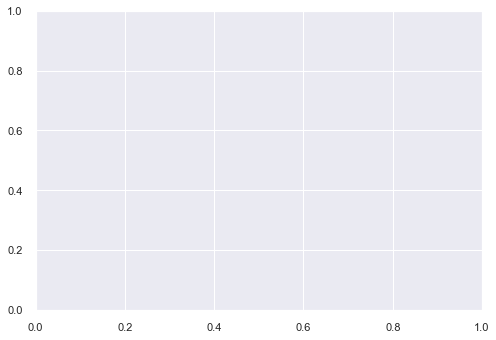

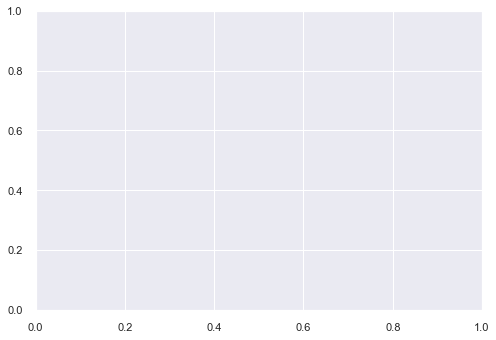

In [22]:
evaluate_model(tuned_dt)

In [65]:
model = predict_model(tuned_dt, data=test_data)

In [67]:
model.head(10)

,id,age,decile_score,priors_count,two_year_recid,sex_Female,sex_Male,age_cat_25 - 45,age_cat_Greater than 45,age_cat_Less than 25,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,Label,Score
0,5,23,8,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0.6512
1,19,47,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0.7989
2,21,37,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0.7963
3,22,25,10,3,0,0,1,1,0,0,1,0,0,0,0,0,1,0.8006
4,27,27,2,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0.6188
5,28,21,4,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0.6003
6,37,27,3,8,1,0,1,1,0,0,1,0,0,0,0,0,1,0.7828
7,42,32,8,4,1,0,1,1,0,0,1,0,0,0,0,0,1,0.6959
8,50,49,3,7,1,0,1,0,1,0,0,0,0,0,0,1,0,0.5053
9,55,29,2,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0.6259


In [69]:
modelAll = predict_model(tuned_dt, com)

In [78]:
modelAll.head()

,id,age,decile_score,priors_count,two_year_recid,sex_Female,sex_Male,age_cat_25 - 45,age_cat_Greater than 45,age_cat_Less than 25,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,Label,Score
0,1,69,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0.8733
1,3,34,3,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0.6874
2,4,24,4,4,1,0,1,0,0,1,1,0,0,0,0,0,1,0.8131
3,5,23,8,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0.6512
4,6,43,1,2,0,0,1,1,0,0,0,0,0,0,0,1,0,0.7598
